In [1]:
#using Dierckx
using GridInterpolations
using Plots
using DelimitedFiles
using StaticArrays
#using NumericIO

In [42]:
mattia_m = readdlm("PANTIRI_F_x_mu.txt");
mattia_xs = convert(Vector{Float64}, vec(mattia_m[2:end,1]))
mattia_μs = convert(Vector{Float64}, mattia_m[2:end,2])
mattia_Fs = convert(Vector{Float64}, mattia_m[2:end,3]);

In [44]:
um_xs = unique(mattia_xs)
um_μs = unique(mattia_μs)
new_mattia_Fs = reshape(mattia_Fs, (length(um_xs), length(um_μs)))

NEW_mattia_xs = [x for x in um_xs for μ in um_μs]
NEW_mattia_μs = [μ for μ in um_xs for μ in um_μs]
NEW_mattia_Fs = reshape(transpose(new_mattia_Fs), (:, 1));

In [45]:
#open("/Users/matteofoglieni/AAA_TESI_MAGISTRALE/GaPSE/data/F_another.txt", "w") do io
#    println(io, "x \t mu \t F")
#    for (x, μ, F) in zip(NEW_mattia_xs,NEW_mattia_μs, NEW_mattia_Fs)
#               println(io, "$x\t $μ \t $F \t ")
#          end
#end

In [19]:
my_m = readdlm("../GaPSE/data/F_REFERENCE.txt", comments=true)
my_xs = convert(Vector{Float64}, my_m[2:end,1])
my_μs = convert(Vector{Float64}, my_m[2:end,2])
my_Fs = convert(Vector{Float64}, my_m[2:end,3]);

In [21]:
grid = RectangleGrid([0., 0.5, 1.],[0., 5, 10.])  	
gridData = [8., 1., 6., 3., 5., 7., 4., 9., 2.]   	
interpolate(grid,gridData,[0.5, 0])

1.0

In [22]:
my_F_grid = GridInterpolations.RectangleGrid( unique(my_μs), unique(my_xs))
my_spline_F(x, μ) = GridInterpolations.interpolate(my_F_grid, my_Fs, [μ, x])

my_spline_F (generic function with 1 method)

In [23]:
mattia_F_grid = GridInterpolations.RectangleGrid( unique(mattia_xs), unique(mattia_μs))
mattia_spline_F(x, μ) = GridInterpolations.interpolate(mattia_F_grid, mattia_Fs, [x, μ])

mattia_spline_F (generic function with 1 method)

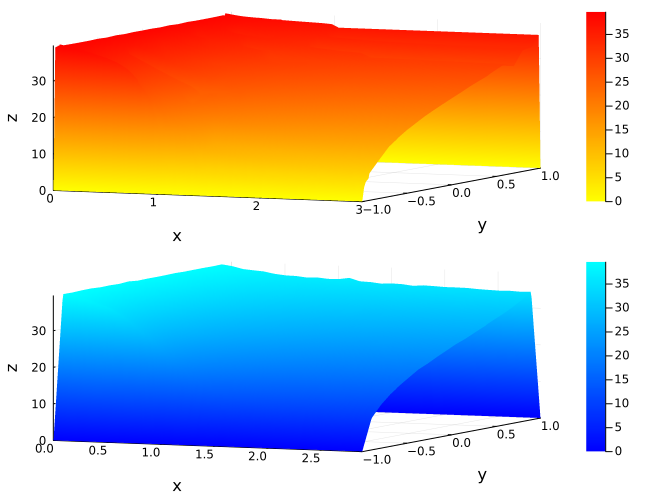

In [41]:
s1 = plot(my_xs, my_μs, my_Fs; 
    xl="x", yl="y", zl="z", st = :surface, 
    c=cgrad([:yellow, :red]), size=(300, 300))
s2 = plot(mattia_xs[mattia_xs.<3], mattia_μs[mattia_xs.<3], mattia_Fs[mattia_xs.<3];
    xl="x", yl="y", zl="z", st = :surface, 
    c=cgrad([:blue, :cyan]), size=(300, 300))
#s3 = plot(s1,s2)

l = @layout [ a ; b ]
plot(s1, s2, layout = l, size=(650, 500), legend=:true)
#scatter!(x, y, z; ms=4, mc=:red, ma=0.6, title="Dierckx Spline2D",titlefont=12)

In [9]:
mattia_on_my_Fs = [mattia_spline_F(x,μ)[1] for (x,μ) in zip(my_xs, my_μs)];

In [10]:
my_on_mattia_Fs = [my_spline_F(x,μ)[1] for (x,μ) in zip(mattia_xs[mattia_xs.<3], mattia_μs[mattia_xs.<3])];

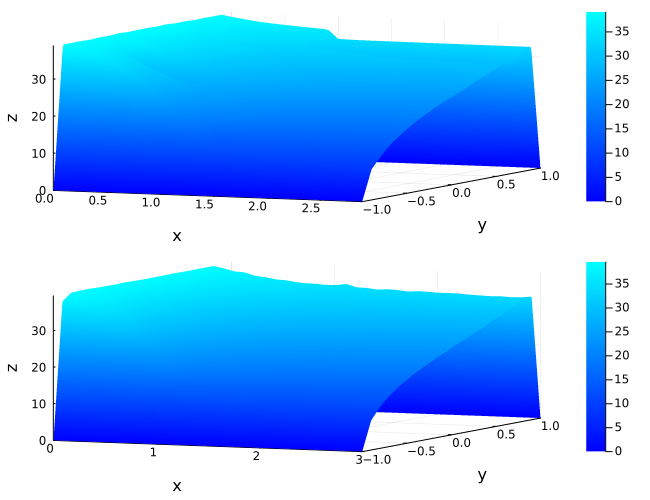

In [11]:
s1 = plot(mattia_xs[mattia_xs.<3], mattia_μs[mattia_xs.<3], my_on_mattia_Fs;
    xl="x", yl="y", zl="z", st = :surface, 
    c=cgrad([:blue, :cyan]), size=(600, 300))
s2 = plot(my_xs, my_μs, mattia_on_my_Fs;
    xl="x", yl="y", zl="z", st = :surface, 
    c=cgrad([:blue, :cyan]), size=(600, 300))

l = @layout [ a ; b ]
plot(s1, s2, layout = l, size=(650, 500), legend=:true)

In [12]:
difference = mattia_Fs[mattia_xs.<3] - my_on_mattia_Fs;

In [13]:
difference[difference.>1];

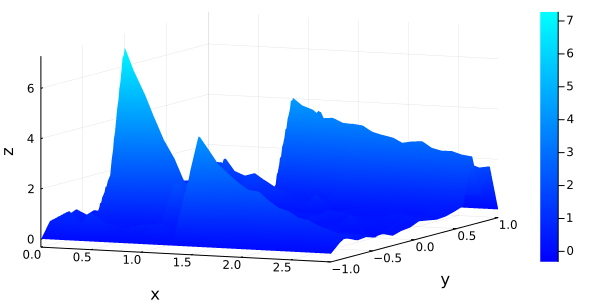

In [14]:
plot(mattia_xs[mattia_xs.<3], mattia_μs[mattia_xs.<3], difference;
    xl="x", yl="y", zl="z", st = :surface, 
    c=cgrad([:blue, :cyan]), size=(600, 300))

In [15]:
an_difference = my_Fs - mattia_on_my_Fs;

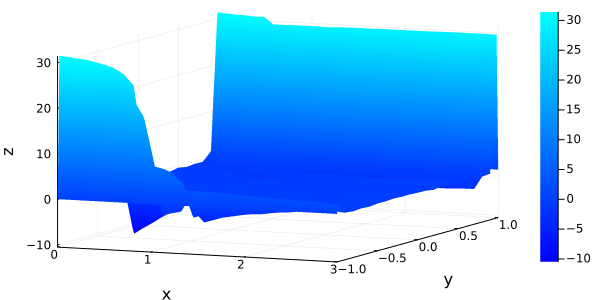

In [16]:
plot(my_xs, my_μs, an_difference;
    xl="x", yl="y", zl="z", st = :surface, 
    c=cgrad([:blue, :cyan]), size=(600, 300))

In [17]:
FILE_F_MAP = "/Users/matteofoglieni/AAA_TESI_MAGISTRALE/GaPSE-free-ipynb/PANTIRI_F_x_mu.txt"
NAMES_F_MAP = ["x", "mu", "F"]

F_map_data = readdlm(FILE_F_MAP, comments = true)
F_map_data_dict = Dict([name => F_map_data[2:end, i] for (i, name) in enumerate(NAMES_F_MAP)]...)

_xs = unique(F_map_data_dict["x"])
_μs = unique(F_map_data_dict["mu"])
#_Fs = reshape(F_map_data_dict["F"], (length(_μs), length(_xs)))'
_Fs = reshape(F_map_data_dict["F"], (length(_μs), length(_xs)))

F_grid = GridInterpolations.RectangleGrid( _xs, _μs)
spline_F(x, μ) = GridInterpolations.interpolate(F_grid, _Fs, [μ, x])

spline_F (generic function with 1 method)

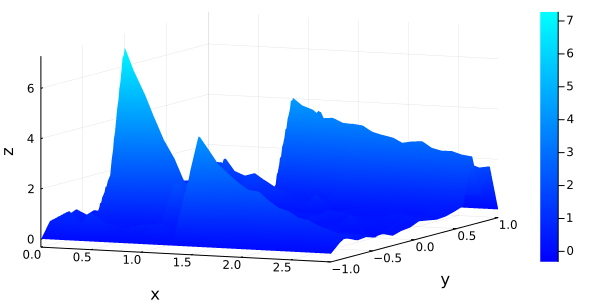

In [18]:
plot(mattia_xs[mattia_xs.<3], mattia_μs[mattia_xs.<3], difference;
    xl="x", yl="y", zl="z", st = :surface, 
    c=cgrad([:blue, :cyan]), size=(600, 300))